Saving googleplaystore.csv to googleplaystore (7).csv
🔎 Пропуски в данных ДО обработки:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

✅ Пропуски в данных ПОСЛЕ обработки:

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64


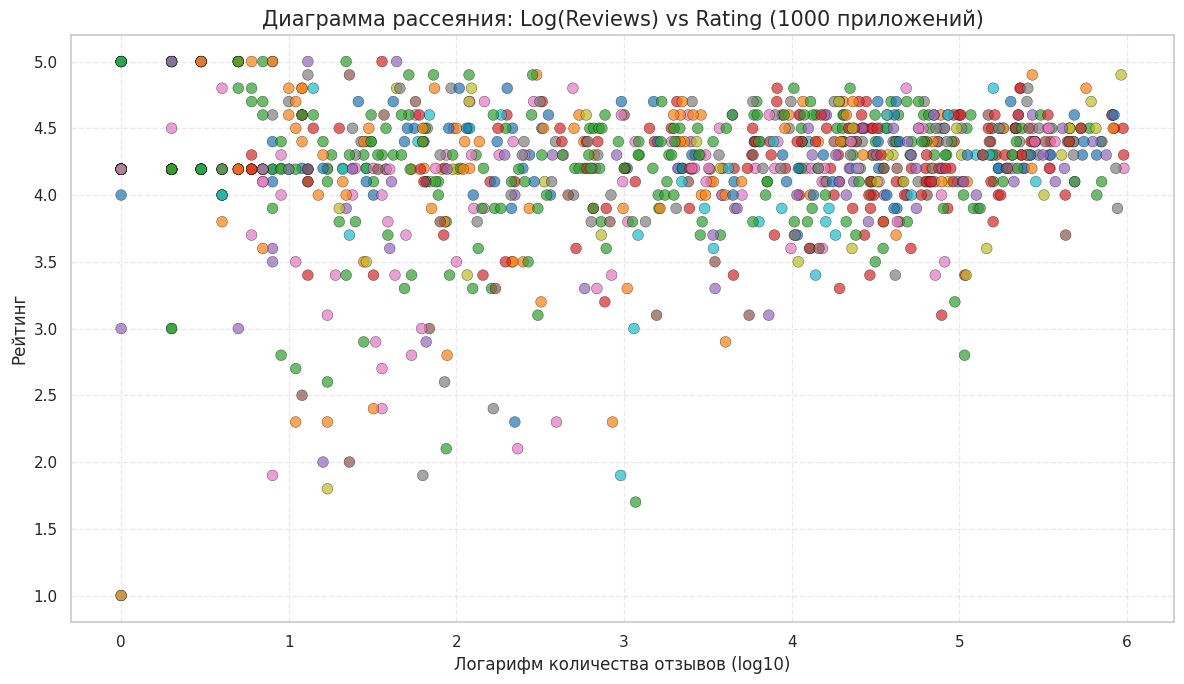

In [7]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка файла
from google.colab import files
uploaded = files.upload()

# Загрузка данных
df = pd.read_csv('googleplaystore.csv')

# Вывод пропусков до обработки
print("🔎 Пропуски в данных ДО обработки:\n")
print(df.isnull().sum())

# Обработка пропусков
df['Genres'] = df['Genres'].fillna(df['Genres'].mode()[0])       # категориальный
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())          # количественный

# Вывод пропусков после обработки
print("\n✅ Пропуски в данных ПОСЛЕ обработки:\n")
print(df.isnull().sum())

# Преобразование 'Reviews'
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df = df.dropna(subset=['Reviews'])
df = df[df['Reviews'] > 0]

# Удаляем выбросы
df = df[(df['Reviews'] < 1_000_000) & (df['Rating'] <= 5)]

# Логарифм отзывов
df['Log_Reviews'] = np.log10(df['Reviews'])

# Берем случайную выборку 1000 строк
df_sample = df.sample(n=1000, random_state=42)

# Стиль графика
sns.set(style="whitegrid")

# Диаграмма рассеяния
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df_sample,
    x='Log_Reviews',
    y='Rating',
    hue='Category',
    palette='tab10',
    alpha=0.7,
    s=60,
    edgecolor='black',
    linewidth=0.3,
    legend=False
)

plt.title('Диаграмма рассеяния: Log(Reviews) vs Rating (1000 приложений)', fontsize=15)
plt.xlabel('Логарифм количества отзывов (log10)', fontsize=12)
plt.ylabel('Рейтинг', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

